# Using the Cars Data-variables to assess the mileage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars= pd.read_csv('Cars-2.csv')

In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Checking the correlation between various variables

In [4]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot to assess the correlation between different variables

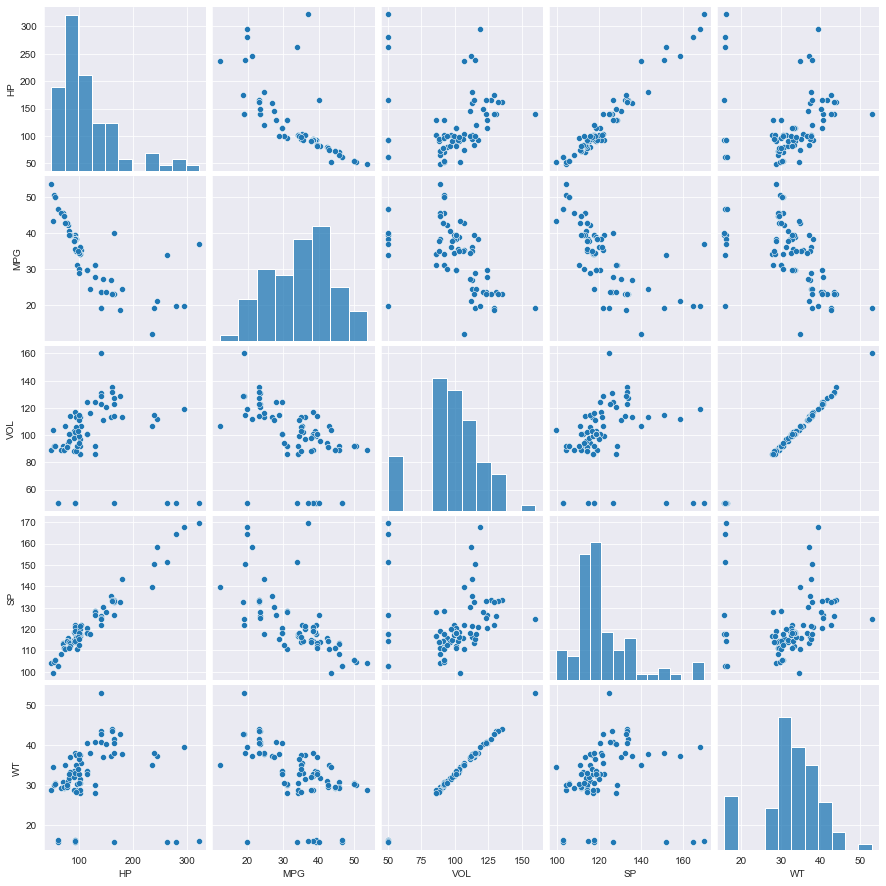

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

### WT and VOL seems to have a correlationship as per the above charts

## Preparing the Model

In [6]:
import statsmodels.formula.api as smf
model= smf.ols('MPG~HP+VOL+SP+WT', data=cars).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.54e-23
Time:                        14:24:05   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### R-squared is 0.77, which is not the best of the values to assess the model and needs further evaluation
##### p value in WT and VOL is higher, stating that there is a need to accept null hypothesis, indicating a correlation
##### AIC and BIC values are also indicating that its not a fit model and needs further analysis

In [8]:
model.params
# individual calculations of residuals

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [9]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [10]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

### Assessing the SL regression models between MPG & VOL  and MPG & WT

In [11]:
ml_v= smf.ols('MPG~VOL', data=cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)
ml_v.summary()

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.82e-07
Time:                        14:24:05   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ml_w=smf.ols('MPG~WT', data=cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)
ml_w.summary()

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           4.38e-07
Time:                        14:24:05   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### It can be seen that there is 27 and 28 percent impact respectively using LS relation between MPG to VOL & WT. Lets calculate MPG to vol and wt together

In [13]:
ml_wv= smf.ols('MPG~WT+VOL', data=cars).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)
ml_wv.summary()

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.43e-06
Time:                        14:24:05   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF- Another aspect to validate the assumptions

In [14]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP', data= cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+HP+SP', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~VOL+HP+WT', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)


In [15]:
d1 = {'Variables': ['HP', 'WT', 'VOL', 'SP'], 'VIF': [vif_hp, vif_wt, vif_vol, vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


### Residual Analysis- Test for Normality of Residuals (Q-Q Plot)

In [16]:
model.resid.min()

-8.631961053868324

In [17]:
model.resid
# errors (y-yˆ)

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

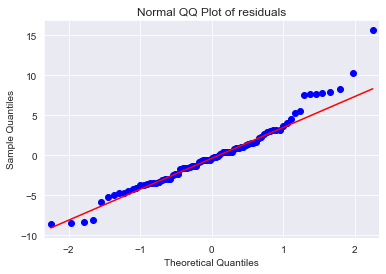

In [18]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal QQ Plot of residuals')
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 0, 76])]

### Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values (vals):
    return (vals - vals.mean())/vals.std()

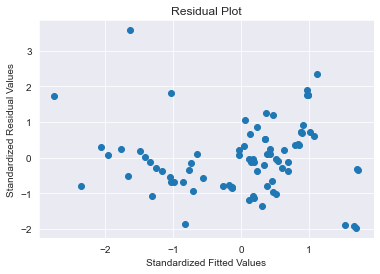

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Residual vs Regressors

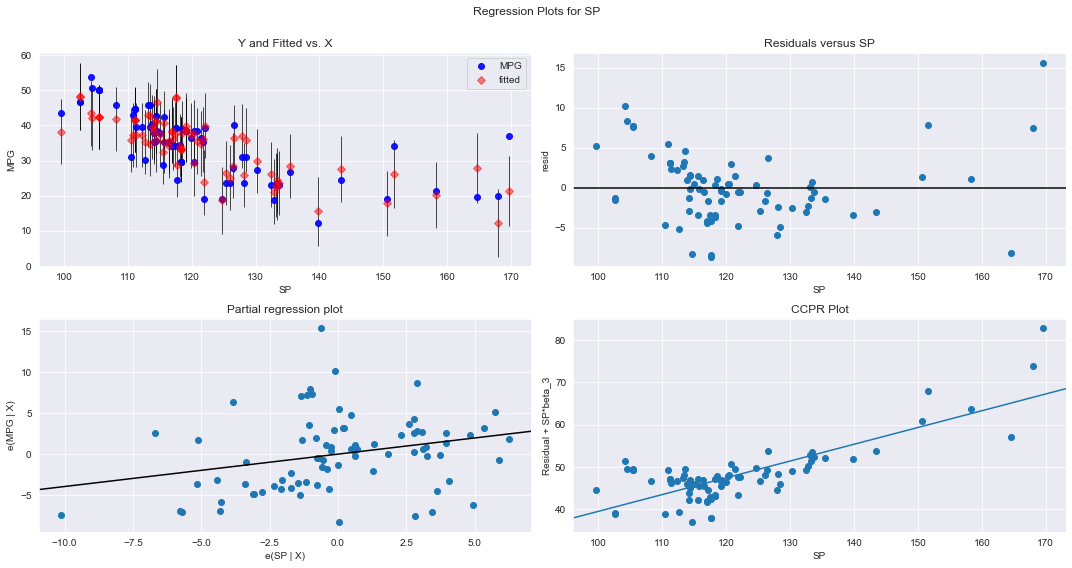

In [22]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

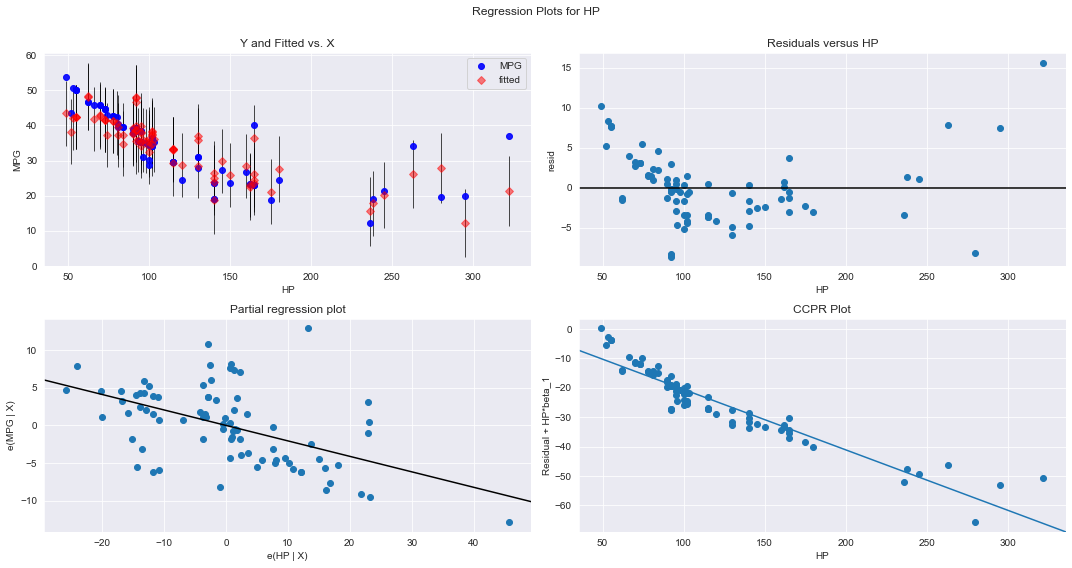

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

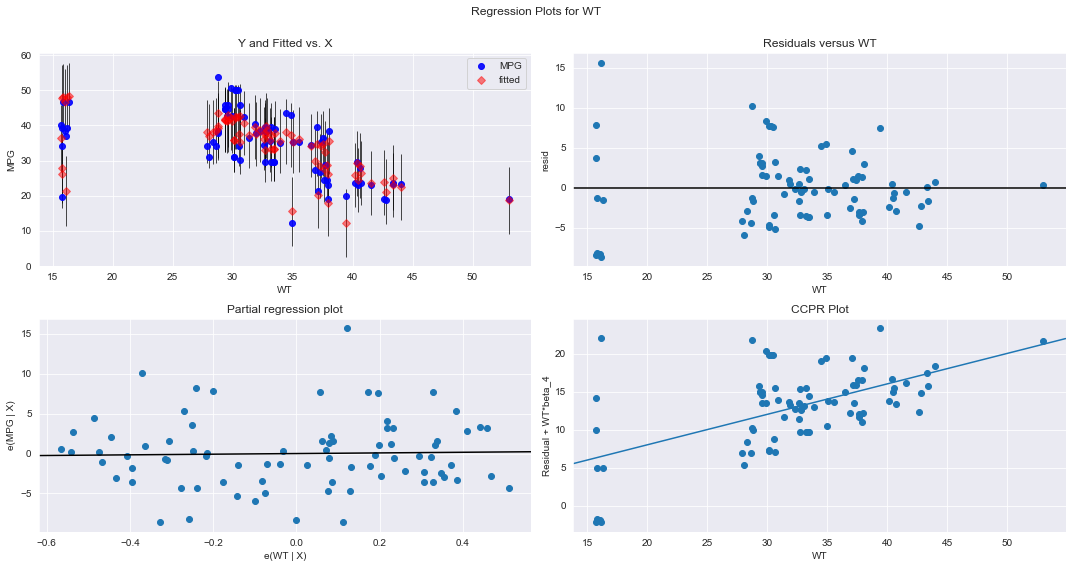

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

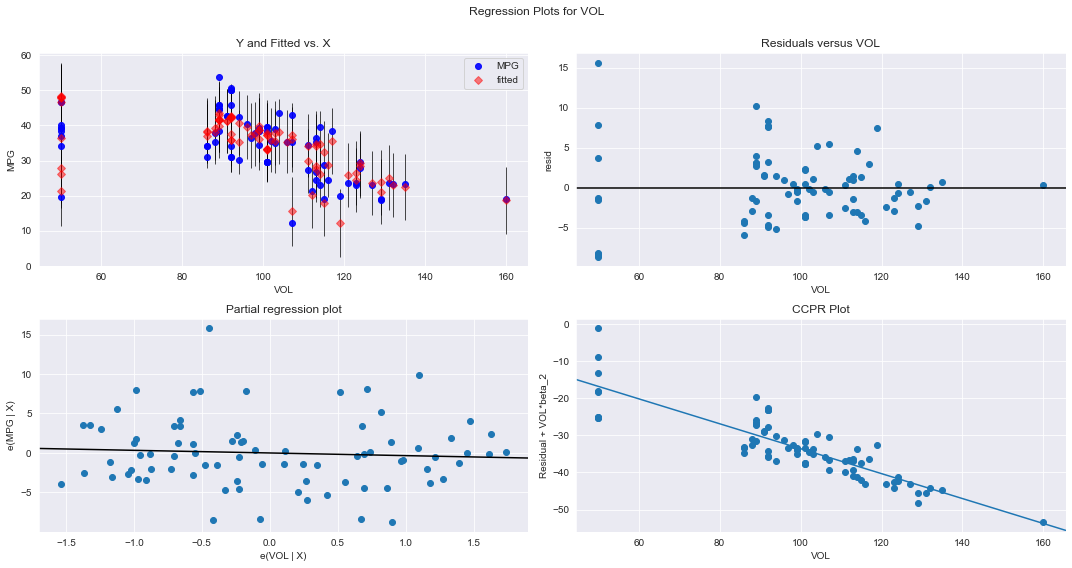

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig )
plt.show()

### Since the VOL and WT seems to be correlated and its cleared
## Model Deletion Diagnostics
### Detecting influencers/Outliers
### Cook's Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

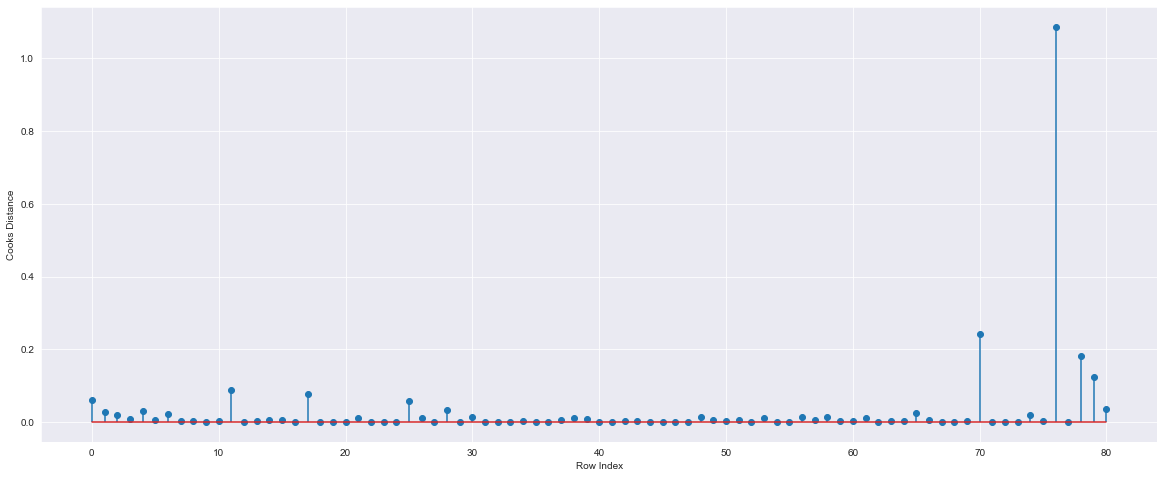

In [27]:
# plotting the influencer values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
np.argmax(c), np.max(c)

(76, 1.0865193998180247)

### High Influence Points

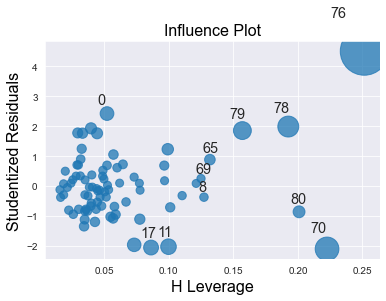

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
cars.shape

(81, 5)

In [31]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.2222222222222222

### Above plot shows the points 70 and 76 as influencers

In [32]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [33]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


### Improving the model by removing the influencer points

In [34]:
cars_new = pd.read_csv('Cars-2.csv')

In [35]:
car1 = cars_new.drop(cars_new.index[[70, 76]], axis=0).reset_index()
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [36]:
car1 = car1.drop(['index'], axis=1)
# dropping the index column 1 as its repetitive

In [37]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


### Building the Model with new dataset

In [40]:
final_ml_V = smf.ols('MPG~VOL+SP+HP', data=car1).fit()
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.65e-27
Time:                        14:24:43   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8161692010376005, 446.11722639447737)

In [46]:
final_ml_W=smf.ols('MPG~WT+SP+HP', data=car1).fit()

In [47]:
(final_ml_W.rsquared, final_ml_W.aic)

(0.8160034320495304, 446.18843235750313)

### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [49]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

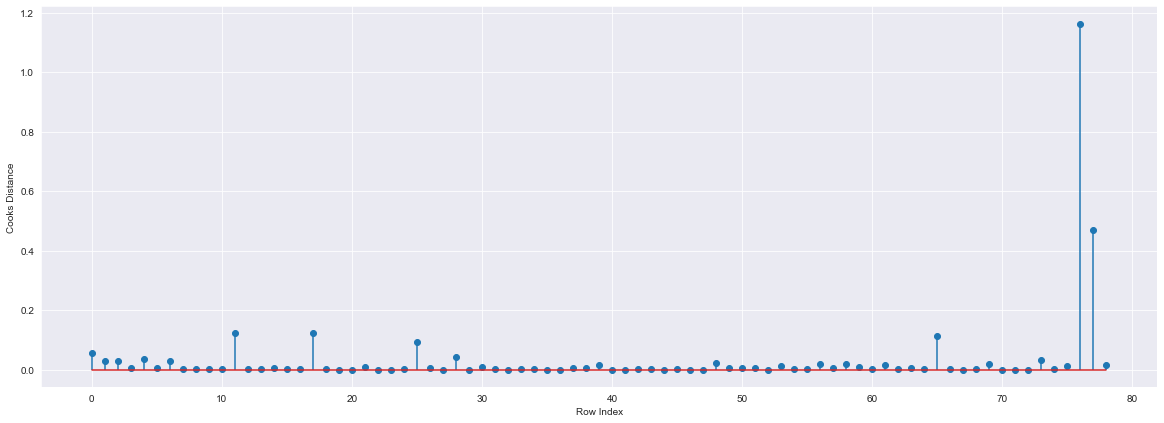

In [52]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)), np.round(c_V, 3));
plt.xlabel('Row Index');
plt.ylabel('Cooks Distance');

In [53]:
np.argmax(c_V), np.max(c_V)

(76, 1.1629387469135215)

In [70]:
car2 = car1.drop(car1.index[[76, 77]], axis=0)
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [71]:
car3 = car2.reset_index()
car3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [72]:
car4 = car3.drop(['index'], axis=1)
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [73]:
final_ml_V = smf.ols('MPG~VOL+HP+SP', data = car4).fit()

In [74]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

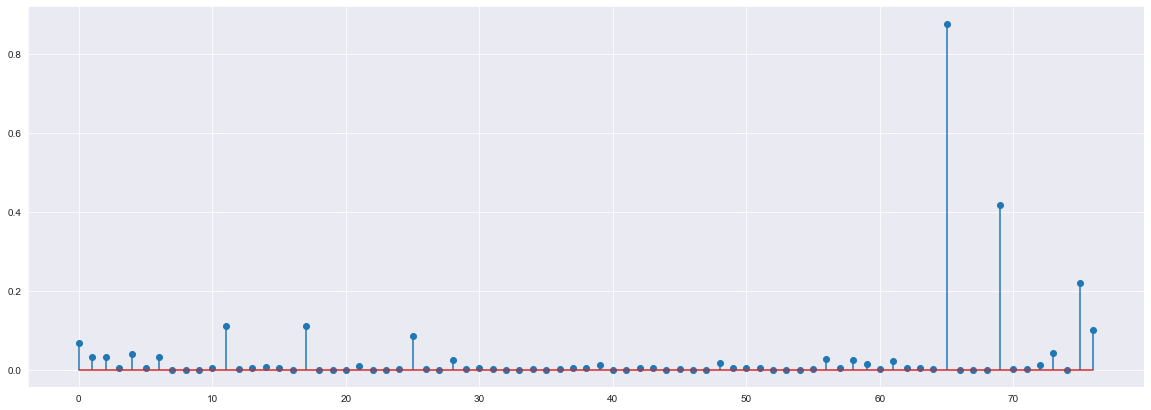

In [75]:
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(car4)), np.round(c_V, 3));

In [76]:
np.argmax(c_V), np.max(c_V)

(65, 0.8774556986296799)

### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [77]:
final_ml_V = smf.ols('MPG~VOL+HP+SP', data = car4).fit()

In [79]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           6.81e-32
Time:                        15:36:41   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicting for new data

In [82]:
import pandas as pd
new_data = pd.DataFrame({'HP': 40, 'VOL': 95, 'SP': 102}, index=[1])
new_data

,HP,VOL,SP
1,40,95,102


In [83]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [84]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [85]:
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [86]:
pred_y = final_ml_V.predict(cars_new)

In [87]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64